In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

In [2]:
df = pd.read_csv('DataFiles/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0
job_blue-collar,4521.0,0.209246,0.406815,0.0,0.0,0.0,0.0,1.0
job_entrepreneur,4521.0,0.037160,0.189174,0.0,0.0,0.0,0.0,1.0
job_housemaid,4521.0,0.024773,0.155451,0.0,0.0,0.0,0.0,1.0
job_management,4521.0,0.214333,0.410404,0.0,0.0,0.0,0.0,1.0


In [12]:
df['y_yes'].value_counts(normalize = True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

* Data looks good, only issue is the balance for the target variable. I will make sure to account for this in my Logistic Regression
* Next step is to make training and testing splits
* My target is y_yes and my features are the rest of the columns
* We also know that this is a classification problem, so I'll make a function to show those metrics quickly

In [11]:
X = df.drop(columns = ['y_yes'])
y = df['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [8]:
# Preprocessor
preprocessor = StandardScaler()

In [73]:
# Function to show metrics for each model
def class_metrics(model, y, X, name = 'Model'):
    fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
    # Store the predictions in a variable
    preds = model.predict(X)
    
    # Print out classification report
    print(f'Test report on {name}: \n{classification_report(y,preds)}')
    
    # Plot a confusion matrix heatmap
    ConfusionMatrixDisplay.from_predictions(y, preds, normalize = 'true', ax = ax[0])
    ax[0].set_title('Confusion Matrix')
    
    # Print the AUC
    print(f'The AUC Score is: {roc_auc_score(y, preds)}')
    
    # Plot the ROC
    RocCurveDisplay.from_predictions(y, preds, ax = ax[1])
    ax[1].set_title('Receiver Operator Curve')
    ax[1].plot([0,1],[0,1], linestyle = '--')

# Dummy Classifier

In [13]:
dumb_classifier = DummyClassifier(strategy='uniform')
dumbPipe = make_pipeline(preprocessor, dumb_classifier)
dumbPipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyclassifier', DummyClassifier(strategy='uniform'))])

Test report on Dummy Classifier on Test Data: 
              precision    recall  f1-score   support

           0       0.88      0.48      0.62      1006
           1       0.10      0.46      0.16       125

    accuracy                           0.48      1131
   macro avg       0.49      0.47      0.39      1131
weighted avg       0.79      0.48      0.57      1131

The AUC Score is: 0.4725566600397615


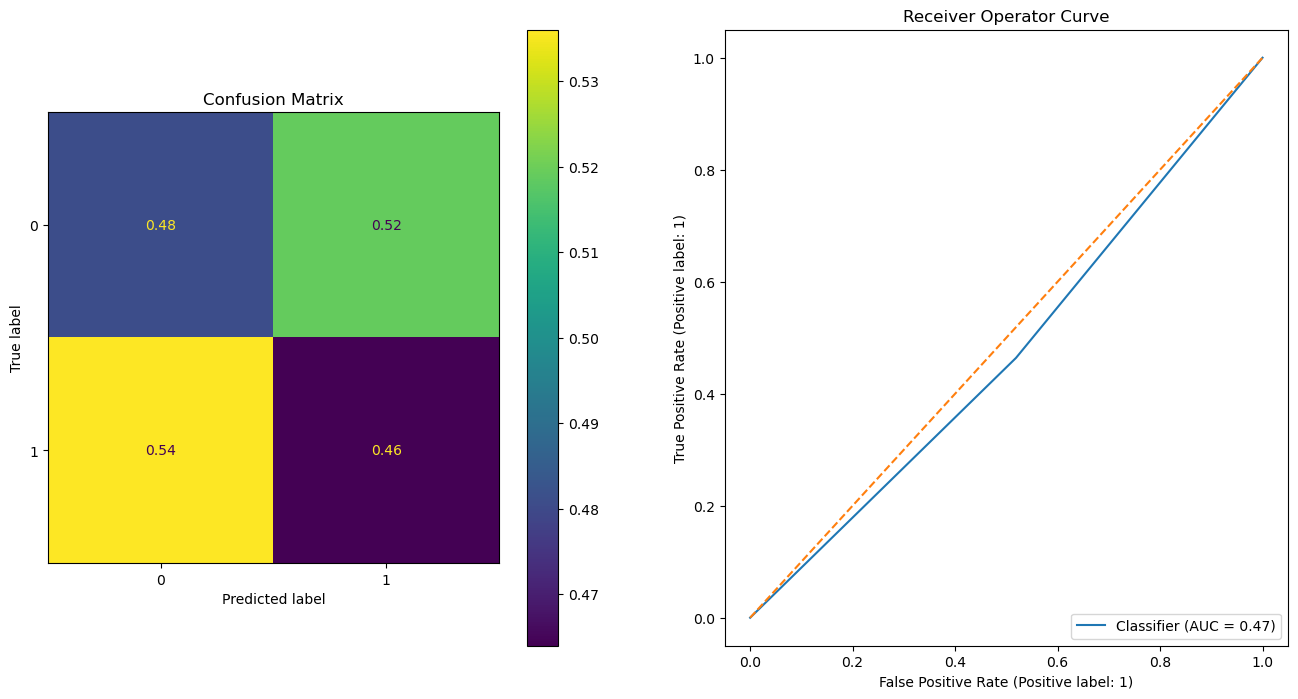

In [74]:
class_metrics(dumbPipe, y_test, X_test, 'Dummy Classifier on Test Data')

* All the metrics are below 50%.
* AUC is .47%, this is worse than random

# Logistic Regression

In [25]:
logReg = LogisticRegression(max_iter = 1000, class_weight='balanced', solver = 'liblinear')
logPipe = make_pipeline(preprocessor, logReg)
logPipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

Test report on Base Log Regression on Test Data: 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1006
           1       0.33      0.73      0.45       125

    accuracy                           0.80      1131
   macro avg       0.64      0.77      0.66      1131
weighted avg       0.89      0.80      0.83      1131

The AUC Score is: 0.7700636182902584


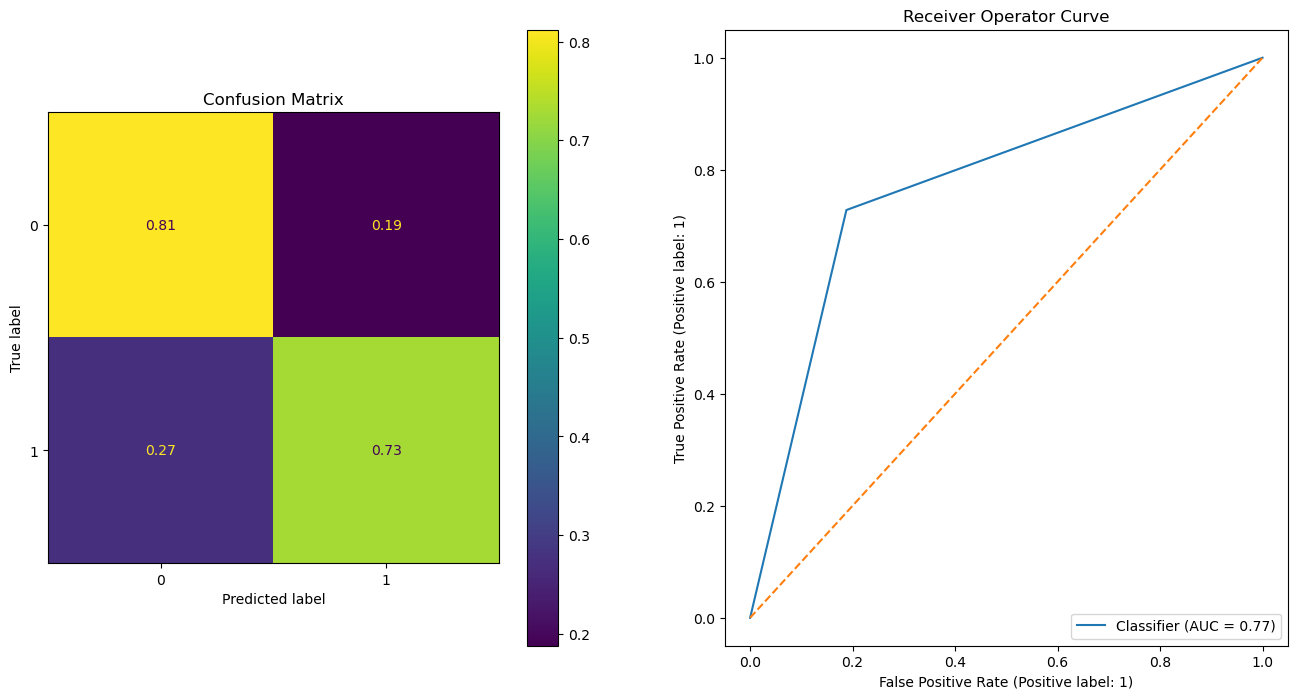

In [75]:
class_metrics(logPipe, y_test, X_test, 'Base Log Regression on Test Data')

Curious, I want to see the model performance without class weights

In [27]:
logReg2 = LogisticRegression(max_iter = 1000, solver = 'liblinear')
logPipe2 = make_pipeline(preprocessor, logReg2)
logPipe2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

Test report on Log Reg no Weights on Test: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1006
           1       0.60      0.27      0.37       125

    accuracy                           0.90      1131
   macro avg       0.76      0.62      0.66      1131
weighted avg       0.88      0.90      0.88      1131

The AUC Score is: 0.624568588469185


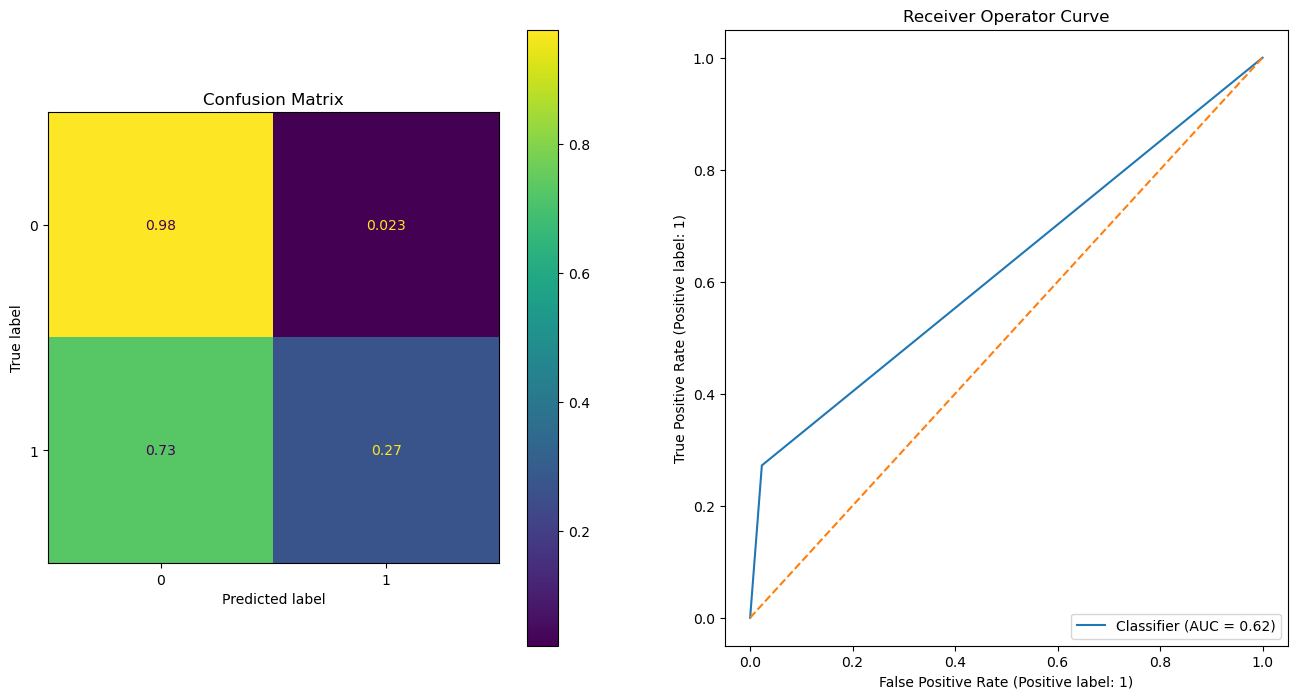

In [76]:
class_metrics(logPipe2, y_test, X_test, 'Log Reg no Weights on Test')

Terrible score, the weights make a big difference

## HyperParameter Tuning
I am going to play with Lasso and Ridge, and tune the alpha

In [29]:
# Running get_params to easily create my params dictionary
logPipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'l

In [50]:
params = {'logisticregression__C': np.arange(0.1, 1.0, .1),#[0.1,0.5,1,5,10,50,100],
         'logisticregression__penalty': ['l1','l2']}
LogGrid = GridSearchCV(logPipe, params, n_jobs = -1)

In [51]:
LogGrid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'logisticregression__penalty': ['l1', 'l2']})

In [52]:
LogGrid.best_params_

{'logisticregression__C': 0.5, 'logisticregression__penalty': 'l1'}

In [53]:
bestLog = LogGrid.best_estimator_
bestLog.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

Test report on Best Log on Test Data: 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1006
           1       0.33      0.73      0.45       125

    accuracy                           0.80      1131
   macro avg       0.64      0.77      0.67      1131
weighted avg       0.89      0.80      0.83      1131

The AUC Score is: 0.7705606361829026


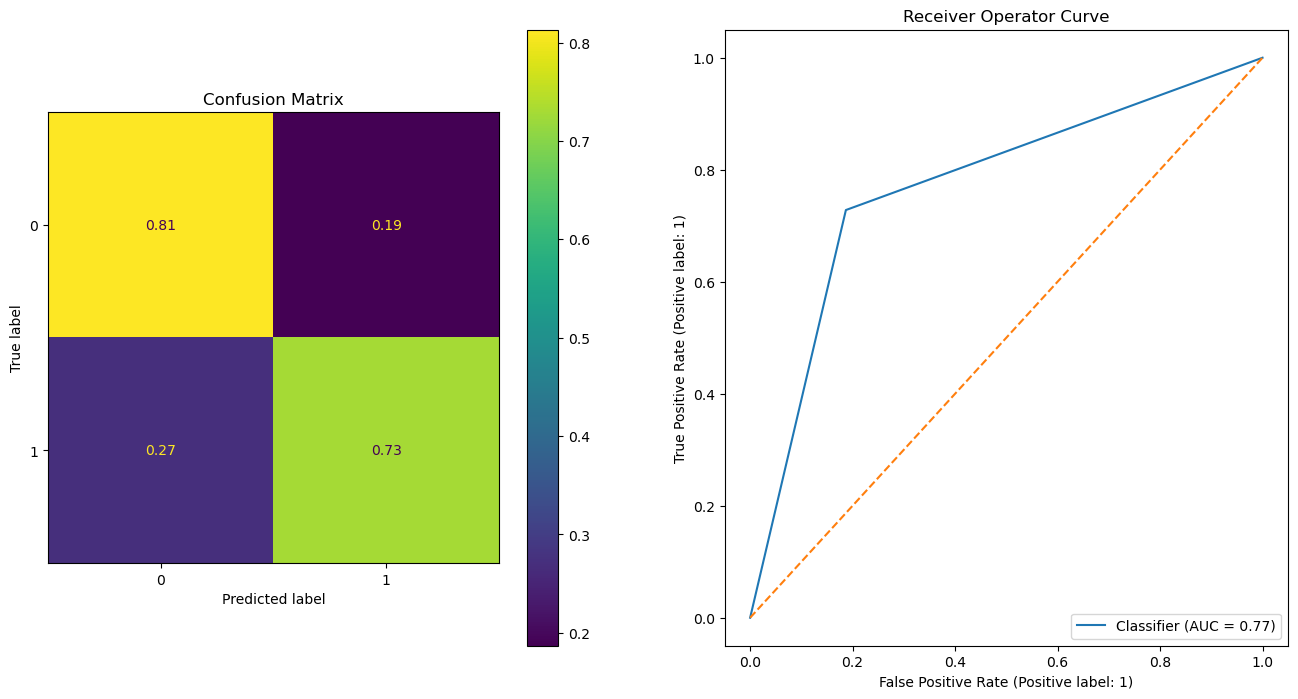

In [77]:
class_metrics(bestLog, y_test, X_test, 'Best Log on Test Data')

# Final Notes
* The best metric to evaluate this model is accuracy.
* The baseline model and the final model have the same accuracy
* Another way to improve the model is to clean out some features in the data